In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from env import TicTacToe

1. Реализуйте обычное (табличное) Q-обучение. Обучите стратегии крестиков и ноликов для доски 3х3.

In [3]:
def q_learning(Q, env, alpha=0.1, gamma=0.9, epsilon=0.01):
    env.reset()
    state, empty_spaces, current_turn = env.getState()
    done = False
    crosses_moves = []
    noughts_moves = []
    while not done: 
        if state in Q:
            action_index = Q[state].argmax() if np.random.rand() > epsilon else np.random.randint(len(empty_spaces))
        else:
            action_index = np.random.randint(len(empty_spaces))
            Q[state] = np.zeros(len(empty_spaces))
        action = empty_spaces[action_index]
        next_state, reward, done, _ = env.step(action)
        if current_turn == 1:
            crosses_moves.append((state, action_index))
        else:
            noughts_moves.append((state, action_index))
        state, empty_spaces, current_turn = next_state
    
    last_move_cr, last_action_cr = crosses_moves[-1]
    last_move_no, last_action_no = noughts_moves[-1]
    Q[last_move_cr][last_action_cr] = reward
    Q[last_move_no][last_action_no] = -reward
    next_crosses = np.max(Q[last_move_cr])
    next_noughts = np.max(Q[last_move_no])
    
    for state, action_index in reversed(crosses_moves[:-1]):
        Q[state][action_index] = Q[state][action_index] + alpha * (gamma * next_crosses - Q[state][action_index])
        next_crosses = np.max(Q[state])
        
    for state, action_index in reversed(noughts_moves[:-1]):
        Q[state][action_index] = Q[state][action_index] + alpha * (gamma * next_noughts - Q[state][action_index])
        next_noughts = np.max(Q[state])
        
    return Q

def run_episode(env, Q, crosses):
    env.reset()
    state, empty_spaces, current_turn = env.getState()
    done = False
    while not done:
        if ((current_turn == 1 and crosses) or (current_turn == -1 and not crosses)) and (state in Q):
            action_idx = Q[state].argmax()
        else:
            action_idx = np.random.randint(len(empty_spaces))
        action = empty_spaces[action_idx]
        next_state, reward, done, _ = env.step(action) 
        state, empty_spaces, current_turn = next_state
    
    if not crosses:
        reward = -reward 
    
    return reward
    
def evaluation(Q, env, crosses, iterations = 100):
    rewards = []
    for _ in range(iterations):
        reward = run_episode(env, Q, crosses)
        rewards.append(reward)
    return rewards
        
def train(env, alpha, epsilon, gamma, iterations_train = 200_000, eval_every = 10_000):
    Q = {}
    rewards = {"crosses": [], "noughts": []}
    for i in tqdm(range(iterations_train)):
        Q = q_learning(Q, env, alpha=alpha, gamma=gamma, epsilon=epsilon)        
        
        if i == 0 or (i + 1) % eval_every == 0:
            rewards_crosses = evaluation(Q, env, True)
            rewards_noughts = evaluation(Q, env, False)
            rewards_crosses_mean_reward = np.mean(rewards_crosses)
            rewards_noughts_mean_reward = np.mean(rewards_noughts)
            print("------------------")
            print(f"mean reward for crosses: {rewards_crosses_mean_reward}")
            print("------------------")
            print(f"mean reward for noughts: {rewards_noughts_mean_reward}")
            rewards["crosses"].append(rewards_crosses_mean_reward)
            rewards["noughts"].append(rewards_noughts_mean_reward)
    return rewards, Q

In [4]:
env = TicTacToe(n_rows=3, n_cols=3, n_win=3)

In [5]:
eval_every = 10_000
rewards, Q = train(env, 0.1, 0.2, 1, iterations_train=100_000, eval_every=eval_every)

  0%|          | 390/100000 [00:00<00:47, 2108.02it/s]

------------------
mean reward for crosses: 0.29
------------------
mean reward for noughts: -0.19


 10%|█         | 10339/100000 [00:03<00:32, 2773.01it/s]

------------------
mean reward for crosses: 0.97
------------------
mean reward for noughts: 0.67


 21%|██        | 20751/100000 [00:07<00:27, 2926.45it/s]

------------------
mean reward for crosses: 1.0
------------------
mean reward for noughts: 0.77


 30%|███       | 30485/100000 [00:10<00:26, 2639.23it/s]

------------------
mean reward for crosses: 0.98
------------------
mean reward for noughts: 0.72


 41%|████      | 40564/100000 [00:13<00:21, 2732.74it/s]

------------------
mean reward for crosses: 1.0
------------------
mean reward for noughts: 0.75


 51%|█████     | 50669/100000 [00:17<00:18, 2678.45it/s]

------------------
mean reward for crosses: 1.0
------------------
mean reward for noughts: 0.87


 61%|██████    | 60683/100000 [00:20<00:14, 2789.16it/s]

------------------
mean reward for crosses: 1.0
------------------
mean reward for noughts: 0.88


 71%|███████   | 70599/100000 [00:23<00:10, 2717.64it/s]

------------------
mean reward for crosses: 1.0
------------------
mean reward for noughts: 0.94


 80%|████████  | 80458/100000 [00:27<00:06, 2800.70it/s]

------------------
mean reward for crosses: 0.98
------------------
mean reward for noughts: 0.9


 91%|█████████ | 90622/100000 [00:30<00:03, 2883.90it/s]

------------------
mean reward for crosses: 1.0
------------------
mean reward for noughts: 0.93


100%|██████████| 100000/100000 [00:33<00:00, 2979.57it/s]

------------------
mean reward for crosses: 0.98
------------------
mean reward for noughts: 0.9


In [6]:
def plot(results_dict, title, eval_every):
    plt.figure(figsize = (14, 8))
    for index, result in enumerate(results_dict):
        mean = results_dict[result]
        plt.plot(np.array(list(range(1, (len(mean)) * eval_every, eval_every))), mean, label = list(results_dict.keys())[index])
        plt.legend()
        plt.title(title)
        plt.ylabel("reward")
        plt.xlabel("experiments")
        plt.grid(True)

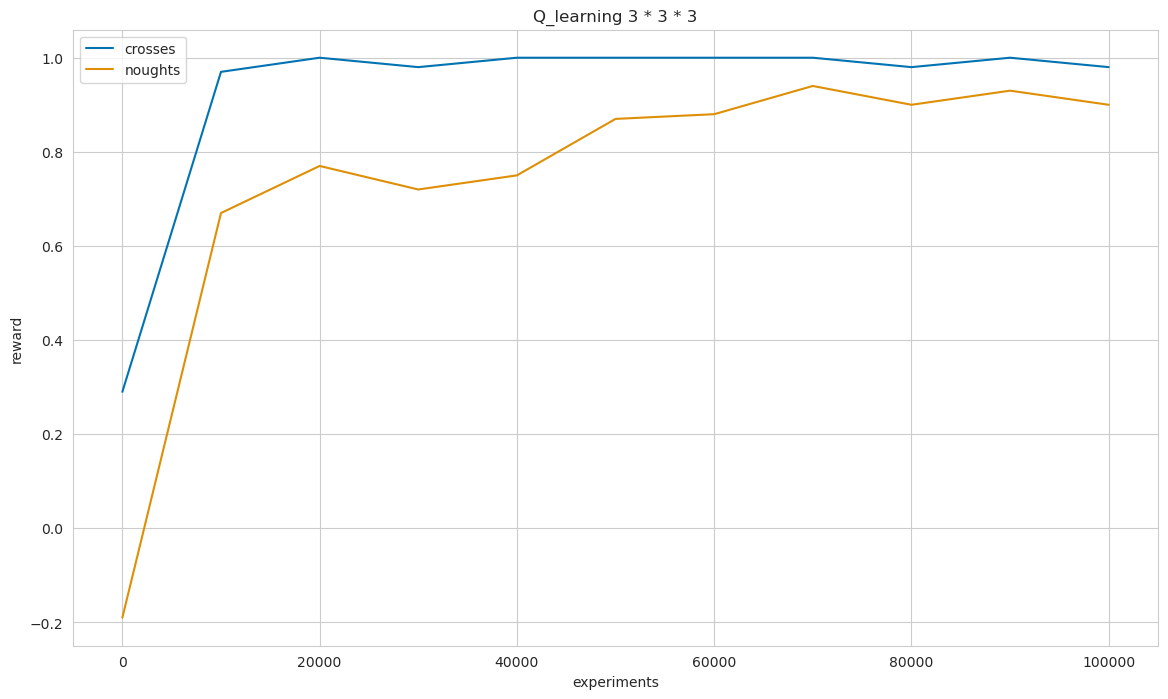

In [7]:
plot(rewards, "Q_learning 3 * 3 * 3", eval_every)

2. Попробуйте обучить стратегии крестиков и ноликов для доски 4х4 и/или 5х5.


In [8]:
env = TicTacToe(n_rows=4, n_cols=4, n_win=4)

In [9]:
eval_every = 100_000
rewards, Q = train(env, 0.1, 0.2, 1, iterations_train=3_000_000, eval_every=eval_every)

  0%|          | 134/3000000 [00:00<1:14:32, 670.69it/s]

------------------
mean reward for crosses: 0.13
------------------
mean reward for noughts: -0.09


  3%|▎         | 100258/3000000 [01:16<44:44, 1080.23it/s]

------------------
mean reward for crosses: 0.05
------------------
mean reward for noughts: 0.05


  7%|▋         | 200204/3000000 [02:31<42:14, 1104.81it/s]

------------------
mean reward for crosses: 0.19
------------------
mean reward for noughts: 0.09


 10%|█         | 300399/3000000 [03:42<38:05, 1181.15it/s]

------------------
mean reward for crosses: 0.27
------------------
mean reward for noughts: -0.05


 13%|█▎        | 400415/3000000 [04:54<35:33, 1218.53it/s]

------------------
mean reward for crosses: 0.32
------------------
mean reward for noughts: 0.08


 17%|█▋        | 500146/3000000 [06:04<36:01, 1156.42it/s]

------------------
mean reward for crosses: 0.38
------------------
mean reward for noughts: 0.15


 20%|██        | 600271/3000000 [07:14<34:37, 1155.14it/s]

------------------
mean reward for crosses: 0.58
------------------
mean reward for noughts: 0.18


 23%|██▎       | 700363/3000000 [08:28<31:52, 1202.57it/s]

------------------
mean reward for crosses: 0.4
------------------
mean reward for noughts: 0.15


 27%|██▋       | 800301/3000000 [09:39<29:41, 1235.06it/s]

------------------
mean reward for crosses: 0.37
------------------
mean reward for noughts: 0.09


 30%|███       | 900310/3000000 [10:51<29:16, 1195.30it/s]

------------------
mean reward for crosses: 0.35
------------------
mean reward for noughts: 0.18


 33%|███▎      | 1000452/3000000 [12:01<25:50, 1289.23it/s]

------------------
mean reward for crosses: 0.52
------------------
mean reward for noughts: 0.22


 37%|███▋      | 1100350/3000000 [13:11<28:32, 1109.17it/s]

------------------
mean reward for crosses: 0.26
------------------
mean reward for noughts: 0.12


 40%|████      | 1200344/3000000 [14:22<25:12, 1189.47it/s]

------------------
mean reward for crosses: 0.34
------------------
mean reward for noughts: 0.25


 43%|████▎     | 1300260/3000000 [15:32<24:44, 1145.14it/s]

------------------
mean reward for crosses: 0.31
------------------
mean reward for noughts: 0.29


 47%|████▋     | 1400401/3000000 [16:43<21:49, 1221.76it/s]

------------------
mean reward for crosses: 0.52
------------------
mean reward for noughts: 0.35


 50%|█████     | 1500266/3000000 [17:53<21:18, 1172.79it/s]

------------------
mean reward for crosses: 0.36
------------------
mean reward for noughts: 0.27


 53%|█████▎    | 1600293/3000000 [19:03<20:13, 1153.00it/s]

------------------
mean reward for crosses: 0.61
------------------
mean reward for noughts: 0.26


 57%|█████▋    | 1700422/3000000 [20:13<17:33, 1233.48it/s]

------------------
mean reward for crosses: 0.16
------------------
mean reward for noughts: 0.26


 60%|██████    | 1800301/3000000 [21:24<16:44, 1194.27it/s]

------------------
mean reward for crosses: 0.69
------------------
mean reward for noughts: 0.32


 63%|██████▎   | 1900272/3000000 [22:36<15:35, 1175.47it/s]

------------------
mean reward for crosses: 0.47
------------------
mean reward for noughts: 0.33


 67%|██████▋   | 2000309/3000000 [23:47<13:35, 1226.23it/s]

------------------
mean reward for crosses: 0.33
------------------
mean reward for noughts: 0.41


 70%|███████   | 2100210/3000000 [24:57<12:58, 1155.33it/s]

------------------
mean reward for crosses: 0.39
------------------
mean reward for noughts: 0.27


 73%|███████▎  | 2200344/3000000 [26:07<10:44, 1240.12it/s]

------------------
mean reward for crosses: 0.66
------------------
mean reward for noughts: 0.4


 77%|███████▋  | 2300432/3000000 [27:18<09:11, 1269.20it/s]

------------------
mean reward for crosses: 0.65
------------------
mean reward for noughts: 0.48


 80%|████████  | 2400183/3000000 [28:27<08:20, 1199.23it/s]

------------------
mean reward for crosses: 0.72
------------------
mean reward for noughts: 0.33


 83%|████████▎ | 2500326/3000000 [29:34<06:39, 1249.51it/s]

------------------
mean reward for crosses: 0.63
------------------
mean reward for noughts: 0.35


 87%|████████▋ | 2600448/3000000 [30:44<05:02, 1320.12it/s]

------------------
mean reward for crosses: 0.7
------------------
mean reward for noughts: 0.35


 90%|█████████ | 2700349/3000000 [31:52<03:54, 1279.09it/s]

------------------
mean reward for crosses: 0.6
------------------
mean reward for noughts: 0.38


 93%|█████████▎| 2800334/3000000 [33:01<02:43, 1223.80it/s]

------------------
mean reward for crosses: 0.61
------------------
mean reward for noughts: 0.44


 97%|█████████▋| 2900379/3000000 [34:10<01:14, 1333.59it/s]

------------------
mean reward for crosses: 0.67
------------------
mean reward for noughts: 0.38


100%|██████████| 3000000/3000000 [35:19<00:00, 1415.17it/s]

------------------
mean reward for crosses: 0.6
------------------
mean reward for noughts: 0.43


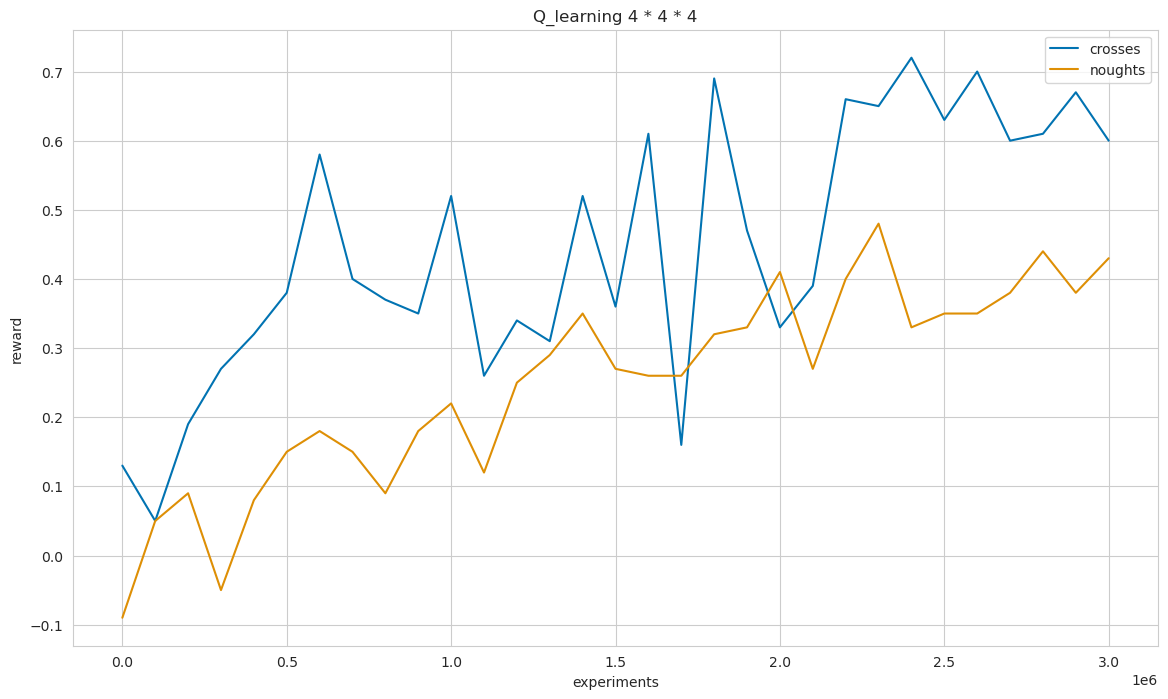

In [10]:
plot(rewards, "Q_learning 4 * 4 * 4", eval_every)

In [11]:
env = TicTacToe(n_rows=5, n_cols=5, n_win=4)

In [12]:
eval_every = 100_000
rewards, Q = train(env, 0.1, 0.2, 1, iterations_train=3_000_000, eval_every=eval_every)

  0%|          | 144/3000000 [00:00<1:59:39, 417.81it/s]

------------------
mean reward for crosses: 0.2
------------------
mean reward for noughts: 0.02


  3%|▎         | 100180/3000000 [02:25<1:36:49, 499.18it/s]

------------------
mean reward for crosses: 0.15
------------------
mean reward for noughts: -0.15


  7%|▋         | 200180/3000000 [04:51<1:33:08, 501.04it/s]

------------------
mean reward for crosses: 0.27
------------------
mean reward for noughts: 0.0


 10%|█         | 300213/3000000 [07:18<1:25:05, 528.77it/s]

------------------
mean reward for crosses: 0.21
------------------
mean reward for noughts: -0.14


 13%|█▎        | 400155/3000000 [09:42<1:23:01, 521.94it/s]

------------------
mean reward for crosses: 0.01
------------------
mean reward for noughts: -0.32


 17%|█▋        | 500215/3000000 [12:03<1:17:24, 538.24it/s]

------------------
mean reward for crosses: 0.15
------------------
mean reward for noughts: -0.26


 20%|██        | 600130/3000000 [14:22<1:21:13, 492.48it/s]

------------------
mean reward for crosses: 0.33
------------------
mean reward for noughts: 0.0


 23%|██▎       | 700193/3000000 [16:42<1:10:34, 543.09it/s]

------------------
mean reward for crosses: 0.39
------------------
mean reward for noughts: -0.02


 27%|██▋       | 800115/3000000 [19:01<1:15:16, 487.13it/s]

------------------
mean reward for crosses: 0.22
------------------
mean reward for noughts: -0.17


 30%|███       | 900189/3000000 [21:25<1:04:58, 538.58it/s]

------------------
mean reward for crosses: 0.34
------------------
mean reward for noughts: -0.05


 33%|███▎      | 1000143/3000000 [23:49<1:04:25, 517.35it/s]

------------------
mean reward for crosses: 0.39
------------------
mean reward for noughts: -0.1


 37%|███▋      | 1100120/3000000 [26:14<1:01:20, 516.26it/s]

------------------
mean reward for crosses: 0.38
------------------
mean reward for noughts: -0.1


 40%|████      | 1200183/3000000 [28:38<57:40, 520.11it/s]  

------------------
mean reward for crosses: 0.25
------------------
mean reward for noughts: -0.05


 43%|████▎     | 1300126/3000000 [31:01<1:00:51, 465.50it/s]

------------------
mean reward for crosses: 0.36
------------------
mean reward for noughts: -0.12


 47%|████▋     | 1400141/3000000 [33:23<54:15, 491.44it/s]  

------------------
mean reward for crosses: 0.41
------------------
mean reward for noughts: -0.04


 50%|█████     | 1500172/3000000 [35:44<48:47, 512.38it/s]

------------------
mean reward for crosses: 0.39
------------------
mean reward for noughts: -0.26


 53%|█████▎    | 1600151/3000000 [38:05<41:57, 555.94it/s]

------------------
mean reward for crosses: 0.53
------------------
mean reward for noughts: -0.33


 57%|█████▋    | 1700125/3000000 [40:25<45:23, 477.34it/s]

------------------
mean reward for crosses: 0.33
------------------
mean reward for noughts: -0.14


 60%|██████    | 1800162/3000000 [42:45<36:40, 545.23it/s]

------------------
mean reward for crosses: 0.33
------------------
mean reward for noughts: -0.07


 63%|██████▎   | 1900181/3000000 [45:03<34:43, 527.85it/s]

------------------
mean reward for crosses: 0.58
------------------
mean reward for noughts: -0.18


 67%|██████▋   | 2000156/3000000 [47:23<29:44, 560.41it/s]

------------------
mean reward for crosses: 0.41
------------------
mean reward for noughts: -0.25


 70%|███████   | 2100169/3000000 [49:41<26:15, 571.08it/s]

------------------
mean reward for crosses: 0.62
------------------
mean reward for noughts: -0.19


 73%|███████▎  | 2200185/3000000 [51:59<23:57, 556.41it/s]

------------------
mean reward for crosses: 0.34
------------------
mean reward for noughts: -0.28


 77%|███████▋  | 2300130/3000000 [54:16<23:33, 495.03it/s]

------------------
mean reward for crosses: 0.54
------------------
mean reward for noughts: -0.12


 80%|████████  | 2400161/3000000 [56:35<17:00, 587.94it/s]

------------------
mean reward for crosses: 0.65
------------------
mean reward for noughts: -0.03


 83%|████████▎ | 2500220/3000000 [58:52<14:35, 570.91it/s]

------------------
mean reward for crosses: 0.49
------------------
mean reward for noughts: -0.18


 87%|████████▋ | 2600207/3000000 [1:01:09<11:01, 604.24it/s]

------------------
mean reward for crosses: 0.48
------------------
mean reward for noughts: -0.35


 90%|█████████ | 2700177/3000000 [1:03:25<08:53, 562.39it/s]

------------------
mean reward for crosses: 0.58
------------------
mean reward for noughts: -0.34


 93%|█████████▎| 2800158/3000000 [1:05:40<05:53, 565.29it/s]

------------------
mean reward for crosses: 0.64
------------------
mean reward for noughts: -0.24


 97%|█████████▋| 2900084/3000000 [1:07:55<03:25, 486.91it/s]

------------------
mean reward for crosses: 0.43
------------------
mean reward for noughts: -0.3


100%|██████████| 3000000/3000000 [1:10:10<00:00, 712.47it/s]

------------------
mean reward for crosses: 0.53
------------------
mean reward for noughts: -0.26


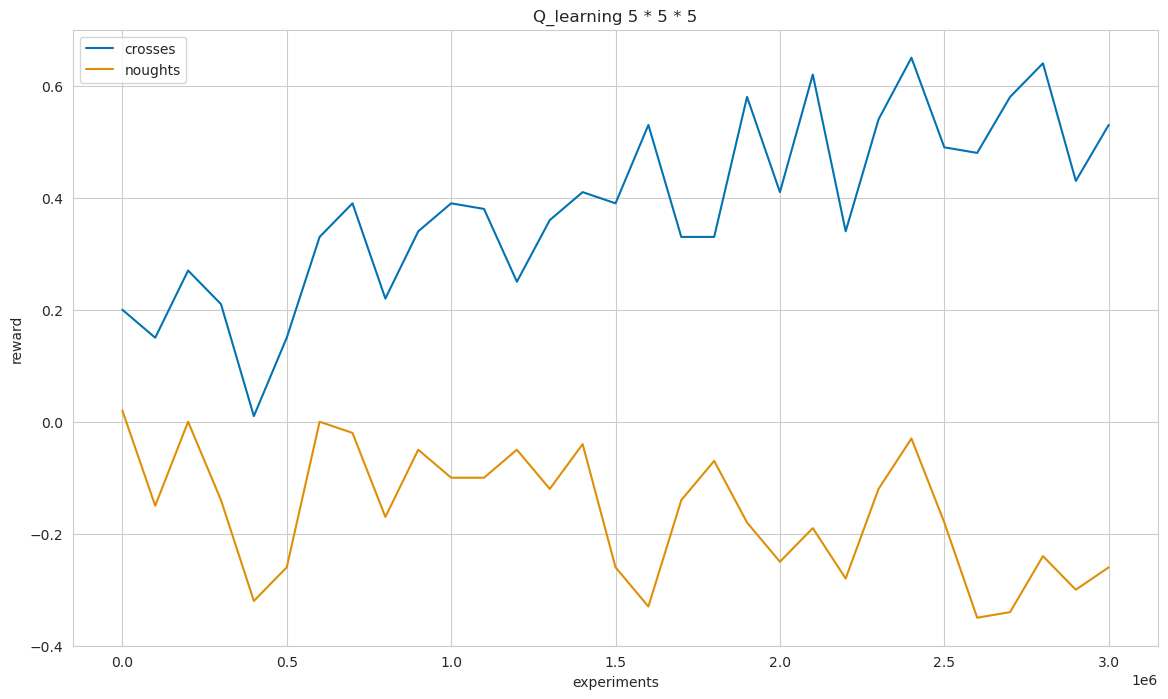

In [13]:
plot(rewards, "Q_learning 5 * 5 * 5", eval_every)